# Predicting Critical Temperatures of Superconductors

Link: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#

In [1]:
import pandas as pd
%matplotlib notebook

df_train = pd.read_csv("train.csv")
df_unique = pd.read_csv("unique_m.csv")

In [2]:
print(df_train.shape)
print(df_unique.shape)

(21263, 82)
(21263, 88)


In [3]:
df_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df_unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [6]:
df_train_X = df_train.iloc[:,0:-1]
df_train_y = df_train.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df_train_X, df_train_y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

6379 6379


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

linear regression train score: 0.7361408390268451
linear regression test score: 0.7385215343124196
ridge regression train score low alpha: 0.7361404898400634
ridge regression test score low alpha: 0.7385104390123198
ridge regression train score high alpha: 0.7296890343388942
ridge regression test score high alpha: 0.7306259536242494


<IPython.core.display.Javascript object>


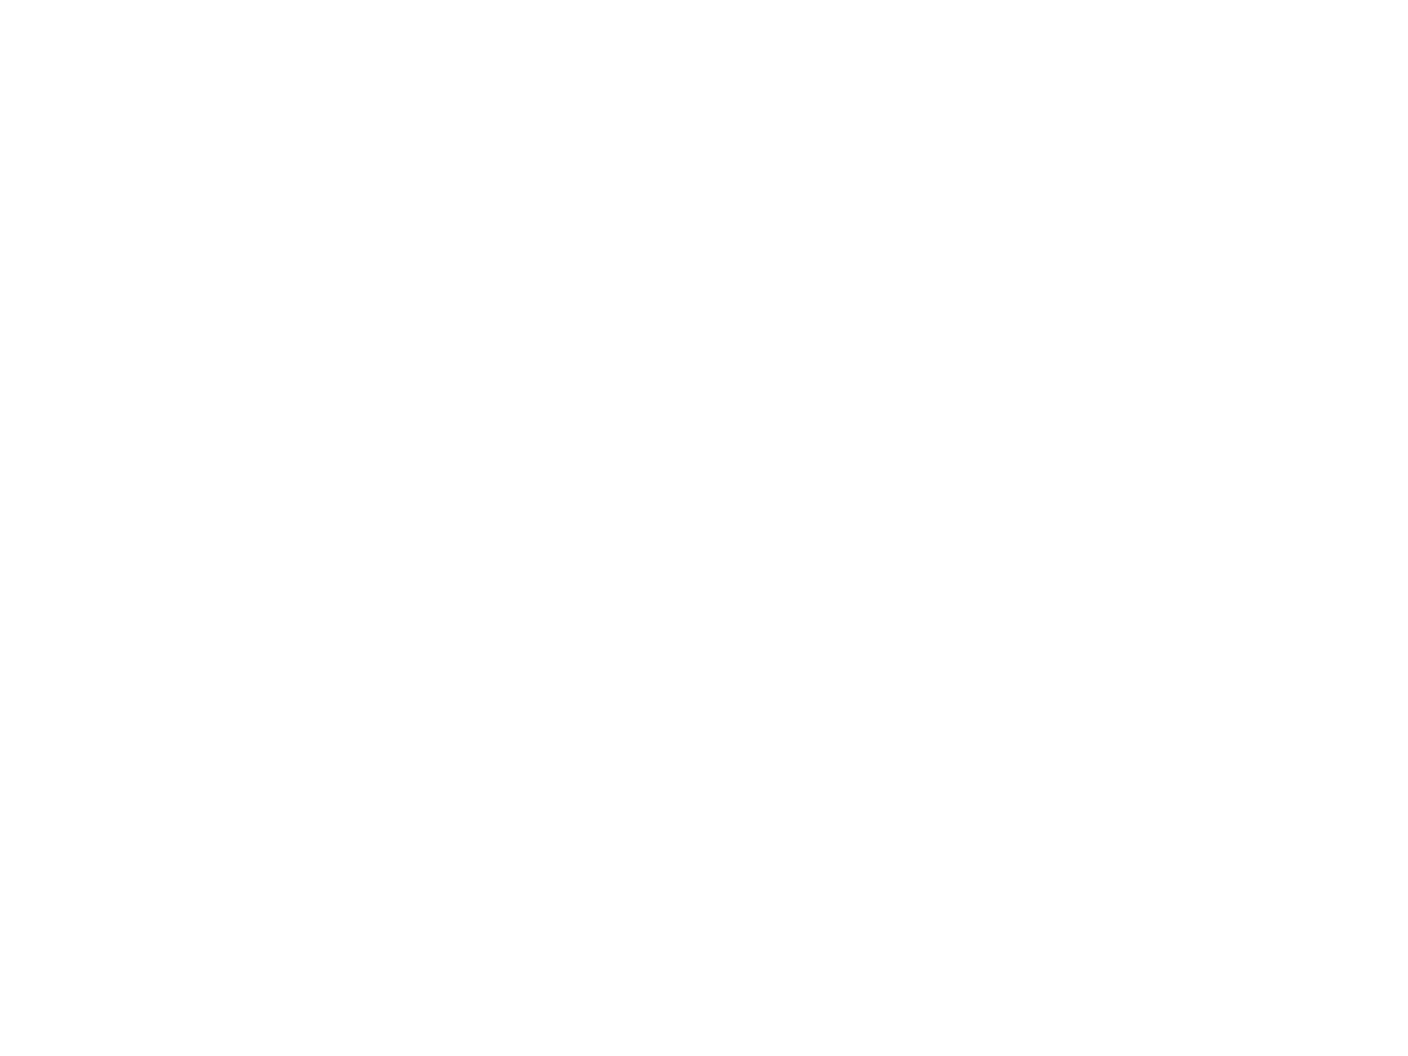

In [10]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
# plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [11]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


training score: 0.7136426339642059
test score:  0.7150251843217291
number of features used:  48
training score for alpha=0.01: 0.734154964067008
test score for alpha =0.01:  0.7355932293194614
number of features used: for alpha =0.01: 74
training score for alpha=0.0001: 0.7361392929249306
test score for alpha =0.0001:  0.7384952482532979
number of features used: for alpha =0.0001: 81
LR training score: 0.7361408390268451
LR test score:  0.7385215343124196


In [12]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(X_train,y_train)
train_score = EN.score(X_train,y_train)
test_score = EN.score(X_test,y_test)
coeff_used = np.sum(EN.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.715153409436935
test score:  0.7164881407719742
number of features used:  53


/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [13]:
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr.fit(X_train,y_train)
train_score = svr.score(X_train,y_train)
test_score = svr.score(X_test,y_test)
coeff_used = np.sum(EN.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.41715906856346197
test score:  0.4004820819664202
number of features used:  53


### Next, Investigate Data Further

After running some prelimenary ml models, we have an idea of the type of model that might work well with this data. Now we want to go back in to clean the data and make it easier to predict

In [14]:
from scipy import stats
y = df_train['critical_temp']

df_train_stats = pd.DataFrame()


def get_stats(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    df_train_stats.loc[i, 'Feature Name'] = df_train.columns[i]
    df_train_stats.loc[i, 'Slope'] = slope
    df_train_stats.loc[i, 'Intercept'] = intercept
    df_train_stats.loc[i, 'R Value'] = r_value
    df_train_stats.loc[i, 'P Value'] = p_value
    df_train_stats.loc[i, 'std_err'] = std_err
    
    
for i in range(len(df_train.columns)):

    try:
        x = df_train.iloc[:,i]
        get_stats(x,y)
    except:
        print("error at: column " + df_train_stats.columns[i])
df_train_stats.head()

,Feature Name,Slope,Intercept,R Value,P Value,std_err
0,number_of_elements,14.305077,-24.447371,0.601069,0.000000e+00,0.130445
1,mean_atomic_mass,-0.131035,45.894353,-0.113523,6.252707e-62,0.007865
2,wtd_mean_atomic_mass,-0.319395,57.733344,-0.312272,0.000000e+00,0.006664
3,gmean_atomic_mass,-0.254279,52.548900,-0.230345,4.745150e-254,0.007367
4,wtd_gmean_atomic_mass,-0.345672,54.656854,-0.369858,0.000000e+00,0.005955


In [15]:
df_train_stats['|R Value|'] = abs(df_train_stats['R Value'])
df_train_stats.sort_values(by=['|R Value|'], ascending = False).head(10)

,Feature Name,Slope,Intercept,R Value,P Value,std_err,|R Value|
81,critical_temp,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
70,wtd_std_ThermalConductivity,0.387797,-2.898052,0.721271,0.0,0.002554,0.721271
67,range_ThermalConductivity,0.148422,-2.816962,0.687654,0.0,0.001075,0.687654
27,range_atomic_radius,0.332888,-11.958372,0.653759,0.0,0.002642,0.653759
69,std_ThermalConductivity,0.372274,-2.413008,0.653632,0.0,0.002956,0.653632
72,wtd_mean_Valence,-18.184695,91.759866,-0.632401,0.0,0.152764,0.632401
6,wtd_entropy_atomic_mass,53.497374,-22.493755,0.626930,0.0,0.455933,0.626930
74,wtd_gmean_Valence,-17.950749,89.276647,-0.615653,0.0,0.157576,0.615653
26,wtd_entropy_atomic_radius,50.772047,-23.008959,0.603494,0.0,0.460064,0.603494
0,number_of_elements,14.305077,-24.447371,0.601069,0.0,0.130445,0.601069


In [16]:
# df_train.isna().sum().sort_values(ascending=False) 
# no null values

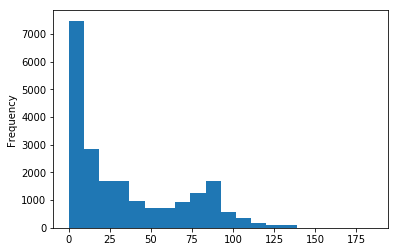

In [17]:
%matplotlib inline
df_train.critical_temp.plot(kind='hist', bins=20)

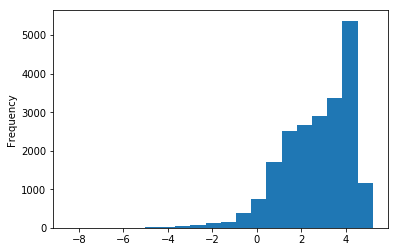

In [18]:
log_crit_temp = np.log(df_train.critical_temp)
log_crit_temp.plot(kind='hist', bins=20)

In [19]:
y_train_log = np.log(y_train)
lr.fit(X_train, y_train_log)
train_score=lr.score(X_train, y_train_log)
test_score=lr.score(X_test, np.log(y_test))
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

#log'ing the y values didnt help the model

linear regression train score: 0.7134197807089373
linear regression test score: 0.727086195710364


In [20]:
df_train.critical_temp.sort_values().head()

14804    0.000210
14803    0.000325
17374    0.000400
14807    0.000500
14806    0.000620
Name: critical_temp, dtype: float64

In [21]:
#----------------------------USE GRIDSEARCHCV TO CHOOSE THE PARAMETERS OF OUR RIDGE REGRESSION MODEL---------------------

# When doing training uncomment the lines with three ###, also make sure to comment out anything from "TRAIN OUR RIDGE REGESSION
# MODEL" and below
from sklearn.model_selection import GridSearchCV # Grid Search for tuning the Ridge Regression

#prepare a range of parameters to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
fit_interceptOptions = ([True, False])
solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])
#create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True) #We have chosen to just normalize the data by default, you could GridsearchCV this is you wanted
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions, solver=solverOptions))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_estimator_.fit_intercept)
print(grid.best_estimator_.solver)

/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00]), 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7331337075651391
0.0
True
svd


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [23]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.21 degrees.


In [26]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print("random forest train score:", train_score)
print("random forest test score:", test_score)

random forest train score: 0.9779839733029906
random forest test score: 0.9277507917331137


In [39]:
from sklearn.metrics import roc_auc_score
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    model = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    train_score=model.score(X_train, y_train)
    test_score=model.score(X_test, y_test)
    print(leaf_size)
    print("random forest train score:", train_score)
    print("random forest test score:", test_score)

1
random forest train score: 0.9780166363605788
random forest test score: 0.9272710926852606
5
random forest train score: 0.9603240940993627
random forest test score: 0.9221292139591573
10
random forest train score: 0.9435185144486566
random forest test score: 0.9136802818554317
50
random forest train score: 0.8896395971528743
random forest test score: 0.8769719082182623
100
random forest train score: 0.862093262784021
random forest test score: 0.8549550447937435
200
random forest train score: 0.822334932058951
random forest test score: 0.818833419636462
500
random forest train score: 0.7627194742068545
random forest test score: 0.7621021068181082
